<a href="https://colab.research.google.com/github/sowmya2k4/Animation-movies-/blob/main/Anime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATA PRE-PROCESSING AND ANALYSIS**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv("Animation_Movies.csv")
df

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages
0,150540,Inside Out,7.922,19463,Released,09-06-2015,857611174,95,False,/j29ekbcLpBvxnGk6LjdTc2EI5SA.jpg,...,en,Inside Out,"Growing up can be a bumpy road, and it's no ex...",107.292,/2H1TmgdfNtsKlU9jKdeNyYL5y8T.jpg,Meet the little voices inside your head.,"Animation, Family, Adventure, Drama, Comedy","Pixar, Walt Disney Pictures",United States of America,English
1,14160,Up,7.949,18857,Released,28-05-2009,735099082,96,False,/hGGC9gKo7CFE3fW07RA587e5kol.jpg,...,en,Up,Carl Fredricksen spent his entire life dreamin...,90.968,/vpbaStTMt8qqXaEgnOR2EE4DNJk.jpg,The greatest adventure is just getting back home.,"Animation, Comedy, Family, Adventure",Pixar,United States of America,English
2,12,Finding Nemo,7.824,18061,Released,30-05-2003,940335536,100,False,/h3uqFk7sZRJvLZDdLiFB9qwbL07.jpg,...,en,Finding Nemo,"Nemo, an adventurous young clownfish, is unexp...",55.456,/ggQ6o8X5984OCh3kZi2UIJQJY5y.jpg,There are 3.7 trillion fish in the ocean. They...,"Animation, Family",Pixar,United States of America,English
3,354912,Coco,8.222,17742,Released,27-10-2017,800526015,105,False,/askg3SMvhqEl4OL52YuvdtY40Yb.jpg,...,en,Coco,Despite his family’s baffling generations-old ...,166.578,/gGEsBPAijhVUFoiNpgZXqRVWJt2.jpg,The celebration of a lifetime,"Family, Animation, Fantasy, Music, Comedy, Adv...","Pixar, Walt Disney Pictures",United States of America,"English, Spanish"
4,10681,WALL·E,8.078,17446,Released,22-06-2008,521311860,98,False,/fK5ssgvtI43z19FoWigdlqgpLRE.jpg,...,en,WALL·E,What if mankind had to leave Earth and somebod...,58.517,/hbhFnRzzg6ZDmm8YAmxBnQpQIPh.jpg,After 700 years of doing what he was built for...,"Animation, Family, Science Fiction","Pixar, Walt Disney Pictures",United States of America,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51939,656677,Белозубка,0.000,0,Released,20-12-2018,0,0,False,NaN,...,ru,Белозубка,NaN,0.600,/r9rYEqBVJIHDUZZPyCkstkiM8Z2.jpg,NaN,Animation,NaN,Russia,NaN
51940,657149,Shimajiro to Ururu no Heroland,0.000,0,Released,15-03-2019,0,60,False,/jQMHu7B7LOY3R2PNJA4bBahEewN.jpg,...,ja,映画しまじろう しまじろうとうるるのヒーローランド,Hero Land is a world where you can meet the he...,2.531,/yGthNH49g4ezKLrn6cUNKygcbtz.jpg,NaN,"Family, Animation, Fantasy","Benesse, Sony Music Direct, TOHO, The Answer S...",Japan,"Japanese, English, Mandarin"
51941,656945,Robo Force: The Revenge of Nazgar,0.000,0,Released,08-12-1984,0,22,False,NaN,...,en,Robo Force: The Revenge of Nazgar,"TV Short for Robo Force, included in Challenge...",1.952,/2l6C7P7zFE5WaLdpyzayYfWdIbW.jpg,NaN,"Animation, Action, Science Fiction",NaN,NaN,English
51942,656893,Beginning Responsibility: A Lunchroom Goes Ban...,0.000,0,Released,01-01-1978,0,12,False,NaN,...,en,Beginning Responsibility: A Lunchroom Goes Ban...,The food in Plumcrest School Cafeteria has gon...,0.600,NaN,NaN,"Animation, Documentary, Family",Coronet Films,NaN,English


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51944 entries, 0 to 51943
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    51944 non-null  int64  
 1   title                 51943 non-null  object 
 2   vote_average          51944 non-null  float64
 3   vote_count            51944 non-null  int64  
 4   status                51944 non-null  object 
 5   release_date          49807 non-null  object 
 6   revenue               51944 non-null  int64  
 7   runtime               51944 non-null  int64  
 8   adult                 51944 non-null  bool   
 9   backdrop_path         15834 non-null  object 
 10  budget                51944 non-null  int64  
 11  homepage              8253 non-null   object 
 12  imdb_id               29551 non-null  object 
 13  original_language     51944 non-null  object 
 14  original_title        51943 non-null  object 
 15  overview           

In [ ]:
df.shape

(51944, 23)

In [ ]:
df.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'adult', 'backdrop_path', 'budget', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages'],
      dtype='object')

In [ ]:
df.isnull().sum()

id                          0
title                       1
vote_average                0
vote_count                  0
status                      0
release_date             2137
revenue                     0
runtime                     0
adult                       0
backdrop_path           36110
budget                      0
homepage                43691
imdb_id                 22393
original_language           0
original_title              1
overview                 6079
popularity                  0
poster_path             14011
tagline                 47266
genres                      0
production_companies    22547
production_countries    12245
spoken_languages        18127
dtype: int64

In [ ]:
df.describe()

,id,vote_average,vote_count,revenue,runtime,budget,popularity
count,5.194400e+04,51944.000000,51944.000000,5.194400e+04,51944.000000,5.194400e+04,51944.000000
mean,6.188031e+05,2.596979,40.396061,1.863500e+06,20.901721,5.759624e+05,1.886246
std,3.479720e+05,3.318695,482.710570,3.049853e+07,39.016315,7.606701e+06,9.701006
min,1.200000e+01,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,3.300552e+05,0.000000,0.000000,0.000000e+00,3.000000,0.000000e+00,0.600000
50%,6.119055e+05,0.000000,0.000000,0.000000e+00,7.000000,0.000000e+00,0.600000
75%,9.158755e+05,6.000000,2.000000,0.000000e+00,19.000000,0.000000e+00,0.882000
max,1.238314e+06,10.000000,19463.000000,1.450027e+09,3720.000000,2.600000e+08,1008.942000


In [ ]:
df.dtypes

id                        int64
title                    object
vote_average            float64
vote_count                int64
status                   object
release_date             object
revenue                   int64
runtime                   int64
adult                      bool
backdrop_path            object
budget                    int64
homepage                 object
imdb_id                  object
original_language        object
original_title           object
overview                 object
popularity              float64
poster_path              object
tagline                  object
genres                   object
production_companies     object
production_countries     object
spoken_languages         object
dtype: object

In [ ]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
51939    False
51940    False
51941    False
51942    False
51943    False
Length: 51944, dtype: bool

In [ ]:
df.drop(['title','status','release_date','revenue','runtime','backdrop_path','budget','homepage','imdb_id','original_title','overview','poster_path','tagline','production_companies','production_countries','spoken_languages'], axis = 1, inplace = True)

In [ ]:
df

,id,vote_average,vote_count,adult,original_language,popularity,genres
0,150540,7.922,19463,False,en,107.292,"Animation, Family, Adventure, Drama, Comedy"
1,14160,7.949,18857,False,en,90.968,"Animation, Comedy, Family, Adventure"
2,12,7.824,18061,False,en,55.456,"Animation, Family"
3,354912,8.222,17742,False,en,166.578,"Family, Animation, Fantasy, Music, Comedy, Adv..."
4,10681,8.078,17446,False,en,58.517,"Animation, Family, Science Fiction"
...,...,...,...,...,...,...,...
51939,656677,0.000,0,False,ru,0.600,Animation
51940,657149,0.000,0,False,ja,2.531,"Family, Animation, Fantasy"
51941,656945,0.000,0,False,en,1.952,"Animation, Action, Science Fiction"
51942,656893,0.000,0,False,en,0.600,"Animation, Documentary, Family"


# **DUMMY VAIRABLE ENCODING**

In [ ]:
unique_values = df['adult'].unique()
print("Unique values in the 'adult' column:", unique_values)

Unique values in the 'adult' column: [False  True]


In [ ]:
df['adult_encoded'] = df['adult'].astype(int)
df.drop(['adult'], axis = 1 , inplace = True)
df

,id,vote_average,vote_count,original_language,popularity,genres,adult_encoded
0,150540,7.922,19463,en,107.292,"Animation, Family, Adventure, Drama, Comedy",0
1,14160,7.949,18857,en,90.968,"Animation, Comedy, Family, Adventure",0
2,12,7.824,18061,en,55.456,"Animation, Family",0
3,354912,8.222,17742,en,166.578,"Family, Animation, Fantasy, Music, Comedy, Adv...",0
4,10681,8.078,17446,en,58.517,"Animation, Family, Science Fiction",0
...,...,...,...,...,...,...,...
51939,656677,0.000,0,ru,0.600,Animation,0
51940,657149,0.000,0,ja,2.531,"Family, Animation, Fantasy",0
51941,656945,0.000,0,en,1.952,"Animation, Action, Science Fiction",0
51942,656893,0.000,0,en,0.600,"Animation, Documentary, Family",0


In [ ]:
dummy_data = pd.get_dummies(df.original_language,drop_first = True)
dummy_data_encoded = dummy_data.astype(int)
dummy_data_encoded

,af,am,ar,as,az,be,bg,bn,bo,bs,...,tl,tr,uk,ur,uz,vi,xx,yi,zh,zu
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51939,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51940,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51941,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51942,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
dummy_data1 = pd.get_dummies(df.genres,drop_first = True)
dummy_data_encoded1 = dummy_data1.astype(int)
dummy_data_encoded1

,"Action, Adventure, Animation, Comedy","Action, Adventure, Animation, Comedy, Crime, Romance, Thriller","Action, Adventure, Animation, Comedy, Crime, TV Movie","Action, Adventure, Animation, Comedy, Family","Action, Adventure, Animation, Comedy, Family, Fantasy","Action, Adventure, Animation, Comedy, Family, Fantasy, Romance","Action, Adventure, Animation, Comedy, Family, Science Fiction","Action, Adventure, Animation, Comedy, Fantasy, Science Fiction","Action, Adventure, Animation, Comedy, Horror","Action, Adventure, Animation, Comedy, Romance, Family",...,"Western, Animation, Comedy, Family","Western, Animation, Music","Western, Animation, TV Movie","Western, Animation, Thriller","Western, Comedy, Animation","Western, Comedy, Animation, Family","Western, Family, Animation, Comedy","Western, Horror, Animation","Western, Science Fiction, Action, Animation","Western, War, Adventure, History, Science Fiction, Animation"
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51939,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51940,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51941,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51942,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.drop(['original_language','genres'], axis = 1 , inplace = True)
df

,id,vote_average,vote_count,popularity,adult_encoded
0,150540,7.922,19463,107.292,0
1,14160,7.949,18857,90.968,0
2,12,7.824,18061,55.456,0
3,354912,8.222,17742,166.578,0
4,10681,8.078,17446,58.517,0
...,...,...,...,...,...
51939,656677,0.000,0,0.600,0
51940,657149,0.000,0,2.531,0
51941,656945,0.000,0,1.952,0
51942,656893,0.000,0,0.600,0


In [ ]:
df_concatenated = pd.concat([df,dummy_data_encoded,dummy_data_encoded1], axis=1)

In [ ]:
df_concatenated

,id,vote_average,vote_count,popularity,adult_encoded,af,am,ar,as,az,...,"Western, Animation, Comedy, Family","Western, Animation, Music","Western, Animation, TV Movie","Western, Animation, Thriller","Western, Comedy, Animation","Western, Comedy, Animation, Family","Western, Family, Animation, Comedy","Western, Horror, Animation","Western, Science Fiction, Action, Animation","Western, War, Adventure, History, Science Fiction, Animation"
0,150540,7.922,19463,107.292,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,14160,7.949,18857,90.968,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12,7.824,18061,55.456,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,354912,8.222,17742,166.578,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10681,8.078,17446,58.517,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51939,656677,0.000,0,0.600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51940,657149,0.000,0,2.531,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51941,656945,0.000,0,1.952,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51942,656893,0.000,0,0.600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **VISUALIZATION**

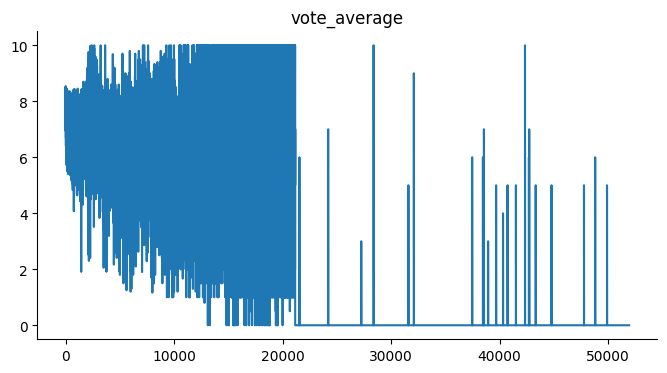

In [ ]:
from matplotlib import pyplot as plt
df['vote_average'].plot(kind='line', figsize=(8, 4), title='vote_average')
plt.gca().spines[['top', 'right']].set_visible(False)

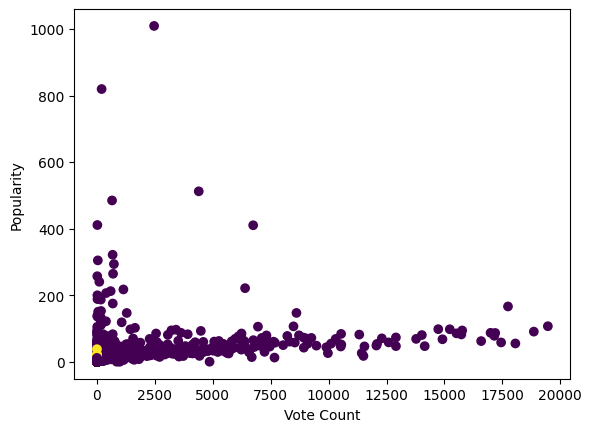

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['vote_count'], df['popularity'], c=df['adult_encoded'])
plt.xlabel('Vote Count')
_ = plt.ylabel('Popularity')

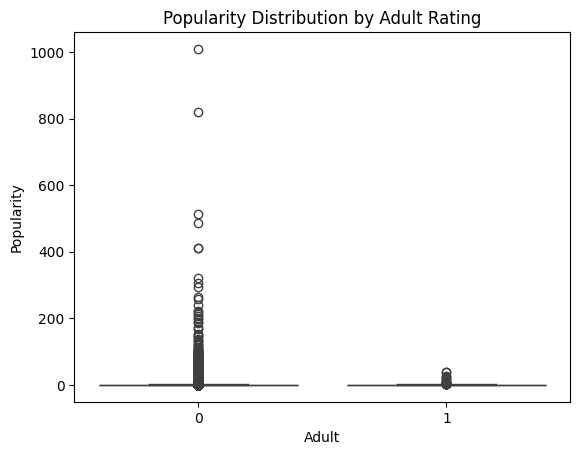

In [ ]:
sns.boxplot(x = 'adult_encoded', y = 'popularity', data = df_concatenated)
plt.xlabel('Adult')
plt.ylabel('Popularity')
plt.title('Popularity Distribution by Adult Rating')
plt.show()


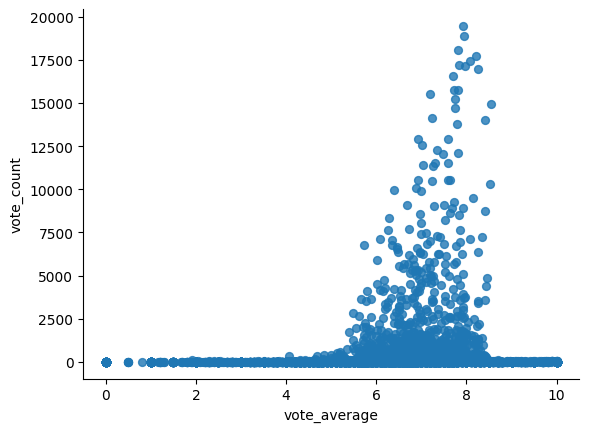

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='vote_average', y='vote_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

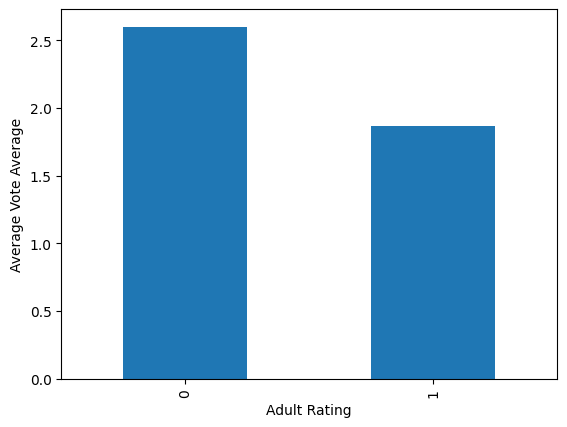

In [ ]:
import matplotlib.pyplot as plt
df.groupby('adult_encoded')['vote_average'].mean().plot(kind='bar')
plt.xlabel('Adult Rating')
_ = plt.ylabel('Average Vote Average')

# **MODEL FITTING**

In [ ]:
x = df_concatenated.drop(['popularity'] , axis = 1 )
y = df_concatenated['popularity']

In [ ]:
from sklearn.model_selection import train_test_split

# **MODEL TRAINING**

**DECISION TREES**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)
x_train.shape, x_test.shape
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
clf = DecisionTreeRegressor()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 score:', metrics.r2_score(y_test, y_pred))

MAE: 0.9923308306863029
RMSE: 11.582689682428265
R2 score: 0.3170261330627885


**KNN**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)
x_train.shape, x_test.shape
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
knn = KNeighborsRegressor(n_neighbors=8)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 score:', metrics.r2_score(y_test, y_pred))

MAE: 1.3566866257058523
RMSE: 12.111171339629072
R2 score: 0.055136686347434516


**LINEAR REGRESSOR**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)
x_train.shape, x_test.shape
from sklearn.linear_model import LinearRegression
from sklearn import metrics
lm = LinearRegression()
lm.fit(x_train,y_train)
y_pred = lm.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 score:', metrics.r2_score(y_test, y_pred))

MAE: 550.8729392257982
RMSE: 51911.52226017288
R2 score: -17358979.654573165


**LASSO REGRESSOR**

In [ ]:
from sklearn.linear_model import Lasso
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)
x_train.shape, x_test.shape
model = Lasso(alpha=0.1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 score:', metrics.r2_score(y_test, y_pred))

MAE: 1.6136882970511095
RMSE: 11.581157578059868
R2 score: 0.1360260818142206


**RIGED REGRESSOR**

In [ ]:
from sklearn.linear_model import Ridge
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)
x_train.shape, x_test.shape
model = Ridge(alpha=0.1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('MAE', metrics.mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 score:', metrics.r2_score(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.27186e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


MAE 1.6275058730040752
RMSE: 11.626223229641148
R2 score: 0.12928905193136786


# **VIF**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

def calc_vif(df):
    vif = pd.DataFrame()
    vif["Variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif

try:
    calc_vif(df_concatenated)
except Exception as e:
    print(e)
calc_vif(df)

SVD did not converge


,Variables,VIF
0,id,1.147964
1,vote_average,1.198130
2,vote_count,1.194225
3,popularity,1.244919
4,adult_encoded,1.005430
